In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [12]:
data = pd.read_csv("weather20172025.csv", index_col=[0],parse_dates=[0])
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24067 entries, 2017-01-12 01:00:00 to 2025-11-20 22:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       24064 non-null  float64
 1   Po      24066 non-null  float64
 2   P       24066 non-null  float64
 3   U       24066 non-null  float64
 4   Ff      24067 non-null  int64  
 5   N       23772 non-null  object 
 6   Tn      3994 non-null   float64
 7   Tx      3075 non-null   float64
 8   H       18272 non-null  object 
 9   VV      22736 non-null  float64
 10  Td      24066 non-null  float64
 11  RRR     6063 non-null   object 
 12  sss     1647 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 2.6+ MB
None


,T,Po,P,U,Ff,N,Tn,Tx,H,VV,Td,RRR,sss
date,,,,,,,,,,,,,
2017-01-12 01:00:00,-18.7,722.5,764.5,79.0,1,"90 или более, но не 100%",NaN,NaN,"2500 или более, или облаков нет.",10.0,-21.5,NaN,NaN
2017-01-12 07:00:00,-12.7,722.4,763.5,85.0,0,100%.,-19.7,NaN,"2500 или более, или облаков нет.",10.0,-14.7,Осадков нет,125.0
2017-01-12 13:00:00,-9.4,726.1,766.9,88.0,0,100%.,NaN,NaN,600-1000,4.0,-11.0,NaN,NaN
2017-01-12 19:00:00,-7.0,728.5,769.0,89.0,1,100%.,NaN,-6.4,300-600,4.0,-8.5,1,NaN
2017-01-13 01:00:00,-10.4,730.4,771.6,86.0,0,"90 или более, но не 100%",NaN,NaN,600-1000,4.0,-12.3,NaN,NaN
2017-01-13 07:00:00,-14.2,730.4,772.2,84.0,0,"90 или более, но не 100%",-15.2,NaN,600-1000,10.0,-16.3,1,120.0
2017-01-13 13:00:00,-14.8,731.1,772.6,80.0,0,60%.,NaN,NaN,600-1000,10.0,-17.5,NaN,NaN
2017-01-13 19:00:00,-15.6,732.6,774.7,83.0,0,70 – 80%.,NaN,NaN,600-1000,4.0,-17.9,"0,3",NaN
2017-01-14 01:00:00,-20.0,733.9,776.9,79.0,0,60%.,NaN,NaN,600-1000,10.0,-22.8,NaN,NaN


In [13]:
df = data.copy()

In [14]:
df['N'].unique()

array(['90  или более, но не 100%', '100%.', '60%.', '70 – 80%.',
       'Облаков нет.', '50%.', '40%.', '20–30%.',
       'Небо не видно из-за тумана и/или других метеорологических явлений.',
       '10%  или менее, но не 0', nan], dtype=object)

In [15]:
df['N'] = df['N'].map({'90  или более, но не 100%': 95, '100%.': 100, '60%.': 60, '70 – 80%.': 75, 'Облаков нет.': 0, '50%.': 50, '40%.': 40,
        '20–30%.': 25, 'Небо не видно из-за тумана и/или других метеорологических явлений.': -1, '10%  или менее, но не 0': 5})

In [16]:
df['RRR'].unique()

array([nan, 'Осадков нет', '1', '0,3', '0,9', '0,4', '2', '0,5', '0,8',
       'Следы осадков', '3', '0,7', '0,2', '9', '4', '8', '0,6', '22',
       '14', '7', '6', '12', '11', '5', '15', '13', '10', '18', '19',
       '16', '28', '26', '21', '17', '29', '24', '0,1', '30', '20', '33',
       '96', '34', '42', '25', '23', '37', '32'], dtype=object)

In [17]:
df['RRR'] = df['RRR'].replace({'Осадков нет': '0', 'Следы осадков': '0.1'}).astype(str).str.replace(',', '.').dropna()
df['RRR'] = pd.to_numeric(df['RRR'], errors='coerce')

In [18]:
df['H'].unique()

array(['2500 или более, или облаков нет.', '600-1000', '300-600',
       '200-300', nan, '1000-1500', '100-200', '50-100', '1500-2000',
       'Менее 50', '2000-2500'], dtype=object)

In [19]:
df['H'] = df['H'].map({'2500 или более, или облаков нет.': 0, '2000-2500': 2, '1500-2000': 3, '1000-1500': 4, '600-1000': 5, '300-600': 6, '200-300': 7,
        '100-200': 8, '50-100': 9, 'Менее 50': 5})

In [20]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24067 entries, 2017-01-12 01:00:00 to 2025-11-20 22:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       24064 non-null  float64
 1   Po      24066 non-null  float64
 2   P       24066 non-null  float64
 3   U       24066 non-null  float64
 4   Ff      24067 non-null  int64  
 5   N       23772 non-null  float64
 6   Tn      3994 non-null   float64
 7   Tx      3075 non-null   float64
 8   H       18272 non-null  float64
 9   VV      22736 non-null  float64
 10  Td      24066 non-null  float64
 11  RRR     6063 non-null   float64
 12  sss     1647 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 2.6 MB
None


,T,Po,P,U,Ff,N,Tn,Tx,H,VV,Td,RRR,sss
date,,,,,,,,,,,,,
2017-01-12 01:00:00,-18.7,722.5,764.5,79.0,1,95.0,NaN,NaN,0.0,10.0,-21.5,NaN,NaN
2017-01-12 07:00:00,-12.7,722.4,763.5,85.0,0,100.0,-19.7,NaN,0.0,10.0,-14.7,0.0,125.0
2017-01-12 13:00:00,-9.4,726.1,766.9,88.0,0,100.0,NaN,NaN,5.0,4.0,-11.0,NaN,NaN
2017-01-12 19:00:00,-7.0,728.5,769.0,89.0,1,100.0,NaN,-6.4,6.0,4.0,-8.5,1.0,NaN
2017-01-13 01:00:00,-10.4,730.4,771.6,86.0,0,95.0,NaN,NaN,5.0,4.0,-12.3,NaN,NaN


In [21]:
df_daily = df.resample('D').agg({
    'sss': 'sum',
    'N':'mean',
    'Po':'mean',
    'Ff':'mean',
    'H':'mean',
    'VV':'mean',
    'T': 'mean',
    'Tn': 'sum',
    'Tx': 'sum',
    'Td': 'mean',
    'RRR': 'sum',
    'U': 'mean',
    'P': 'mean'
})


In [22]:
df_daily.isna().sum()

sss      0
N        0
Po       0
Ff       0
H      399
VV     282
T        0
Tn       0
Tx       0
Td       0
RRR      0
U        0
P        0
dtype: int64

In [23]:
df_daily = df_daily.drop(['H','VV'], axis=1)

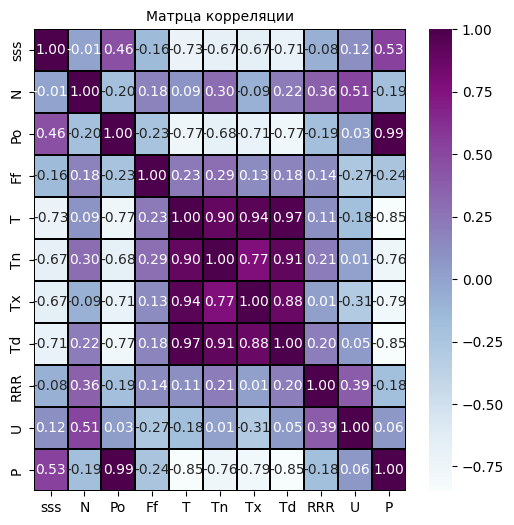

In [24]:
# проверим корреляцию признаков
plt.figure(figsize=(6, 6))
correlation_matrix = df_daily.corr(numeric_only=True)
plt.title('Матрца корреляции', fontsize = 10)
sns.heatmap(correlation_matrix,
            linewidths=0.1,
            linecolor='black',
            annot=True,
            fmt='.2f',
            cmap='BuPu')
plt.show()

In [25]:
df_daily = df_daily.drop(['Tx','Tn','Td','N','Po'], axis=1)

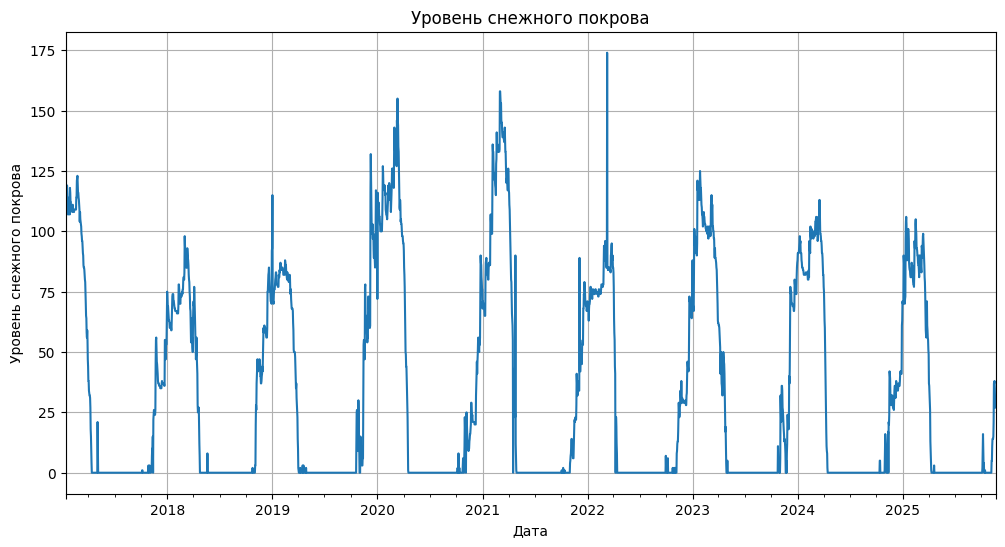

In [26]:
df_daily['sss'].plot(figsize=(12,6))
plt.title('Уровень снежного покрова')
plt.xlabel('Дата')
plt.ylabel('Уровень снежного покрова')
plt.grid(True)
plt.show()

In [27]:
df_daily['month'] = df_daily.index.month
df_daily['month'] = df_daily['month'].map({5: 1, 6: 1, 7: 1, 8: 1, 4: 2, 9: 1, 10: 2, 3: 3, 11: 3, 12: 4, 1:4, 2:4})
df_daily

,sss,Ff,T,RRR,U,P,month
date,,,,,,,
2017-01-12,125.0,0.500,-11.9500,1.0,85.25,765.9750,4
2017-01-13,120.0,0.000,-13.7500,1.3,83.25,772.7750,4
2017-01-14,117.0,0.000,-16.5500,1.3,80.00,776.5000,4
2017-01-15,119.0,1.000,-10.6250,4.0,83.00,776.5500,4
2017-01-16,119.0,0.000,-12.9250,4.0,82.50,779.5750,4
...,...,...,...,...,...,...,...
2025-11-16,38.0,0.000,-12.6500,0.0,79.75,783.3125,3
2025-11-17,35.0,0.125,-10.8625,0.0,83.00,777.9125,3
2025-11-18,30.0,0.375,-4.3375,1.0,89.50,778.8125,3


In [28]:
for lag in range(1,50):
    df_daily[f'lag_{lag}'] = df_daily['sss'].shift(lag)
df_daily = df_daily.dropna()
df_daily.head()

,sss,Ff,T,RRR,U,P,month,lag_1,lag_2,lag_3,...,lag_40,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49
date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,104.0,1.000000,-3.133333,0.0,83.666667,768.700000,3,109.0,111.0,113.0,...,107.0,107.0,109.0,115.0,119.0,119.0,119.0,117.0,120.0,125.0
2017-03-03,108.0,1.000000,-4.700000,0.0,72.500000,776.050000,3,104.0,109.0,111.0,...,108.0,107.0,107.0,109.0,115.0,119.0,119.0,119.0,117.0,120.0
2017-03-04,105.0,0.250000,-4.675000,0.0,75.500000,778.275000,3,108.0,104.0,109.0,...,108.0,108.0,107.0,107.0,109.0,115.0,119.0,119.0,119.0,117.0
2017-03-05,104.0,0.333333,-2.033333,0.0,70.333333,778.266667,3,105.0,108.0,104.0,...,114.0,108.0,108.0,107.0,107.0,109.0,115.0,119.0,119.0,119.0
2017-03-06,103.0,0.666667,-4.133333,0.0,73.333333,775.200000,3,104.0,105.0,108.0,...,110.0,114.0,108.0,108.0,107.0,107.0,109.0,115.0,119.0,119.0


In [29]:


df_train = df_daily['2017-01-26' : '2025-02-01']
df_valid = df_daily['2025-02-01' : '2025-04-01']
df_test = df_daily.iloc[-30:]

scaler = MinMaxScaler()

index = df_train.index
columns = df_train.columns
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train), index=index, columns=columns)
index = df_valid.index
columns = df_valid.columns
df_valid_scaled = pd.DataFrame(scaler.transform(df_valid), index=index, columns=columns)
index = df_test.index
columns = df_test.columns
df_test_scaled = pd.DataFrame(scaler.transform(df_test), index=index, columns=columns)

x_train = df_train_scaled.drop(['sss'], axis=1)
y_train = df_train_scaled['sss']

x_valid = df_valid_scaled.drop(['sss'], axis=1)
y_valid = df_valid_scaled['sss']

x_test = df_test_scaled.drop(['sss'], axis=1)
y_test = df_test_scaled['sss']




In [30]:
#Линейная регрессия с L2-регуляризацией
model_ridge = Ridge()
alphas = np.logspace(-3, 3, 50)  # 50 точек от 10^-3 до 10^3
parametrs = {'alpha': alphas }
cv = TimeSeriesSplit(n_splits=5)

grid = GridSearchCV(model_ridge, parametrs, cv=cv, scoring='r2')
grid.fit(x_train, y_train)

print('\033[1mОптимальные параметры:\033[0m ', grid.best_params_)

model_ridge.set_params(**grid.best_params_)
model_ridge.fit(x_train, y_train)
predictions = model_ridge.predict(x_valid)

r2_ridge = r2_score(y_valid, predictions)
mape_ridge = mean_absolute_percentage_error(y_valid, predictions)


print('\033[1mMAPE на валидационной выборке:\033[0m ', mape_ridge,
      '\n\033[1mR2 на валидационной выборке:\033[0m ', r2_ridge)

Оптимальные параметры:  {'alpha': np.float64(0.1206792640639329)}
MAPE на валидационной выборке:  0.04231210899593712 
R2 на валидационной выборке:  0.8928479444612667


In [32]:
# тестируем модель RandomForest
parametrs = {'n_estimators': [100, 300, 500],
             'max_depth': [5, 10, 15] }
model_rf = RandomForestRegressor()
cv = TimeSeriesSplit(n_splits=5)

grid = GridSearchCV(model_rf, parametrs, cv=cv, scoring='r2')
grid.fit(x_train, y_train)

print('\033[1mОптимальные параметры:\033[0m ', grid.best_params_)

model_rf.set_params(**grid.best_params_)
model_rf.fit(x_train, y_train)
predictions = model_rf.predict(x_valid)

mape_rf = mean_absolute_percentage_error(y_valid, predictions)
r2_rf = r2_score(y_valid, predictions)


print('\033[1mMAPE на валидационной выборке:\033[0m ', mape_rf,
      '\n\033[1mR2 на валидационной выборке:\033[0m ', r2_rf)

Оптимальные параметры:  {'max_depth': 10, 'n_estimators': 100}
MAPE на валидационной выборке:  0.04222961734223567 
R2 на валидационной выборке:  0.8816924776020602


In [ ]:
# тестируем модель GradientBoosting
parametrs = {'n_estimators': [100, 200, 500],
             'max_depth':  [3, 5, 10, 15],
             'learning_rate': [0.01, 0.1, 0.5]}
model_gb = GradientBoostingRegressor()
cv = TimeSeriesSplit(n_splits=5)

grid = GridSearchCV(model_gb, parametrs, cv=cv, scoring='r2')
grid.fit(x_train, y_train)

print('\033[1mОптимальные параметры:\033[0m ', grid.best_params_)

model_gb.set_params(**grid.best_params_)
model_gb.fit(x_train, y_train)
predictions = model_gb.predict(x_valid)

mape_rf = mean_absolute_percentage_error(y_valid, predictions)
r2_rf = r2_score(y_valid, predictions)


print('\033[1mMAPE на валидационной выборке:\033[0m ', mape_rf,
      '\n\033[1mR2 на валидационной выборке:\033[0m ', r2_rf)

Оптимальные параметры:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
MAPE на валидационной выборке:  0.04403010561608562 
R2 на валидационной выборке:  0.8886202363532969


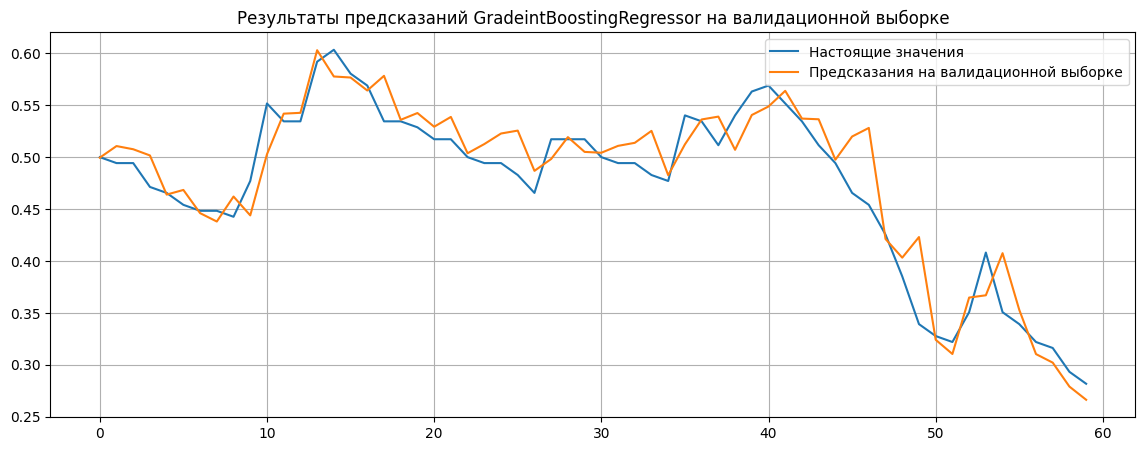

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(y_valid.values, label='Настоящие значения')
plt.plot(predictions, label='Предсказания на валидационной выборке')
plt.title('Результаты предсказаний GradeintBoostingRegressor на валидационной выборке')
plt.legend()
plt.grid()
plt.show()

In [ ]:

model = Ridge(alpha=0.1206792640639329)
x_train_2 = pd.concat([x_train, x_valid], axis=0)
y_train_2 = pd.concat([y_train, y_valid], axis=0)

predictions = pd.DataFrame(columns=['sss'], index=x_test.index)
features_test = pd.DataFrame(scaler.transform(df_daily.iloc[[-31]]),index=df_daily.iloc[[-31]].index, columns=df_daily.iloc[[-31]].columns).drop(['sss'],axis=1)


for i in range(len(x_test)):
    y_train_2 = y_train_2.shift(-1).dropna()
    x_train_2 = x_train_2[:-1]
    model.fit(x_train_2, y_train_2)
    y_pred = model.predict(features_test)
    predictions.iloc[i] = y_pred

mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('\033[1mMAPE на тестовой выборке:\033[0m ', mape,
      '\n\033[1mR2 на тестовой выборке:\033[0m ', r2)

MAPE на тестовой выборке:  62001128203932.24 
R2 на тестовой выборке:  0.6085522088395606


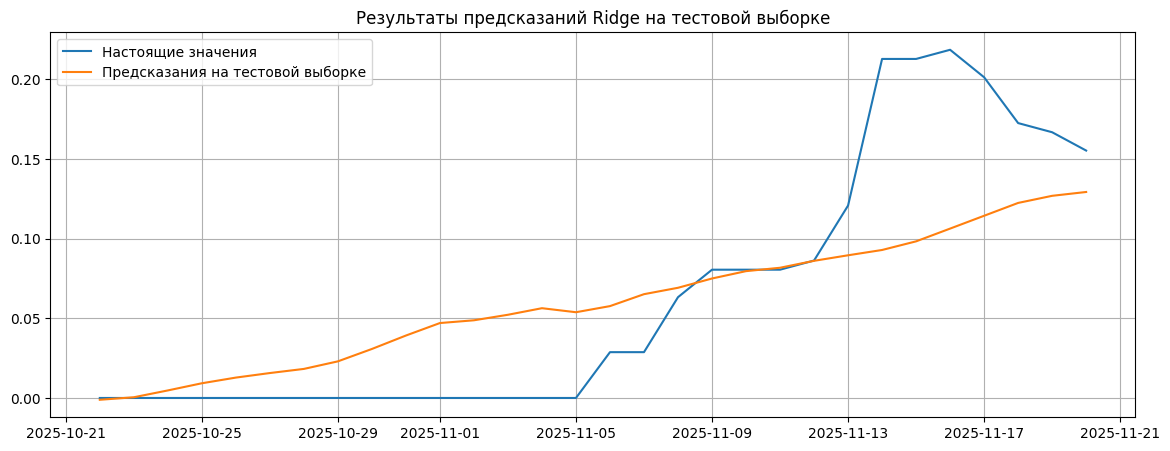

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Настоящие значения')
plt.plot(predictions, label='Предсказания на тестовой выборке')
plt.title('Результаты предсказаний Ridge на тестовой выборке')
plt.legend()
plt.grid()
plt.show()

In [ ]:
index = df_daily.index
columns = df_daily.columns
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_daily), index=index, columns=columns)
x_train = df_train_scaled.drop(['sss'], axis=1)
y_train = df_train_scaled['sss']

dates = pd.date_range("2025-11-21", "2025-12-21", freq="D")
model = Ridge(alpha=0.1206792640639329)
predictions = pd.DataFrame(columns=['sss'], index=dates)
features_test = x_train.iloc[[-1]]


for i in range(len(dates)):
    y_train = y_train.shift(-1).dropna()
    x_train = x_train[:-1]
    model.fit(x_train, y_train)
    y_pred = model.predict(features_test)
    predictions.iloc[i] = y_pred


In [ ]:
columns = df_daily.columns
forecast = pd.DataFrame(scaler.inverse_transform(np.hstack((np.array(predictions), np.array(x_train.iloc[-31:])))),index=dates,columns=columns)
forecast['sss']

,sss
2025-11-21,32.191301
2025-11-22,32.283248
2025-11-23,34.493255
2025-11-24,35.487901
2025-11-25,36.860171
2025-11-26,38.145714
2025-11-27,38.737190
2025-11-28,39.249212
2025-11-29,40.062536
2025-11-30,41.257640


In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(forecast['sss'], label='Предсказания на 21.11-21.12')
plt.title('Предсказания')
plt.legend()
plt.grid()
plt.show()

NameError: name 'forecast' is not defined

<Figure size 1600x500 with 0 Axes>